=== Head of the Dataset ===
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa   

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4  

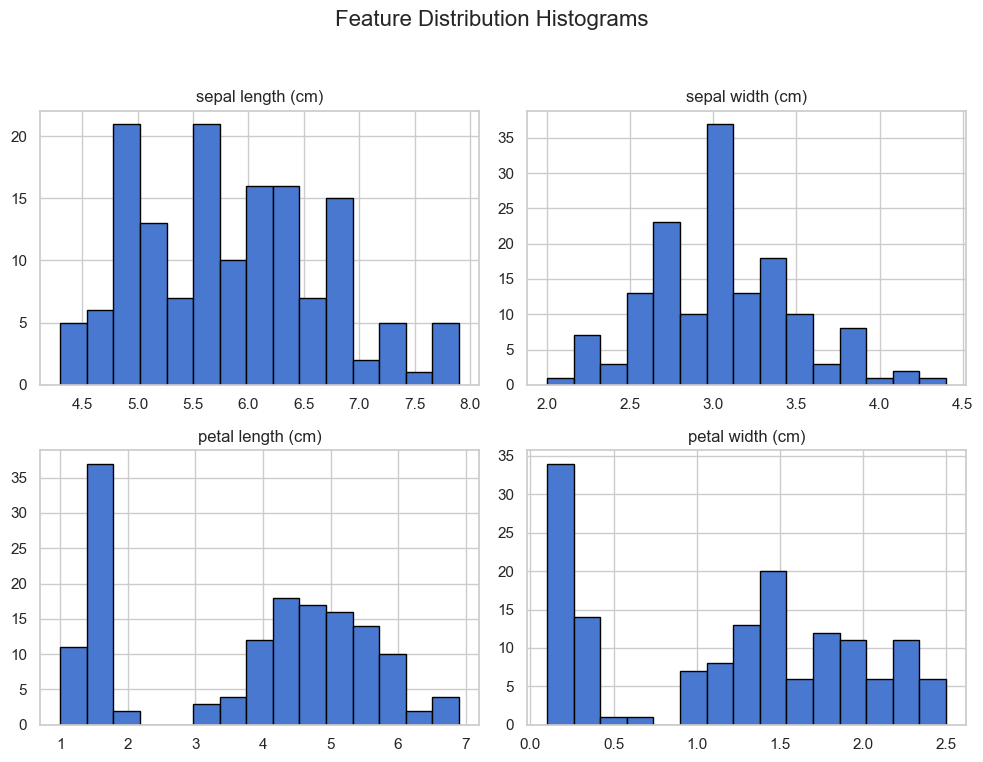

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu

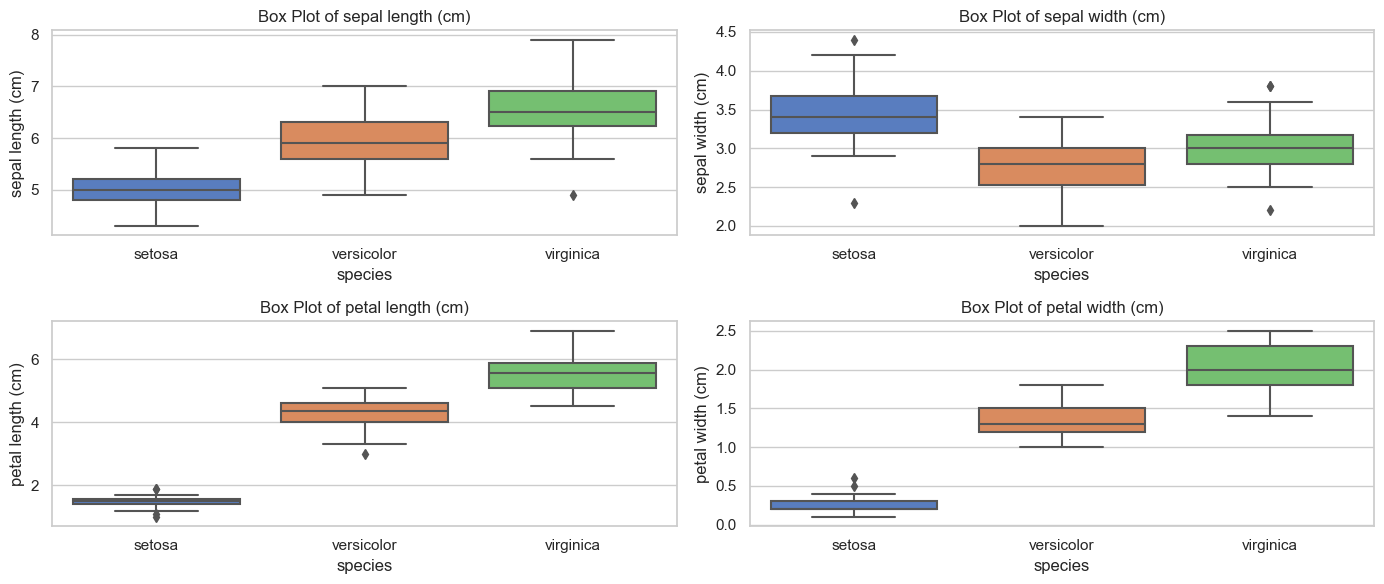

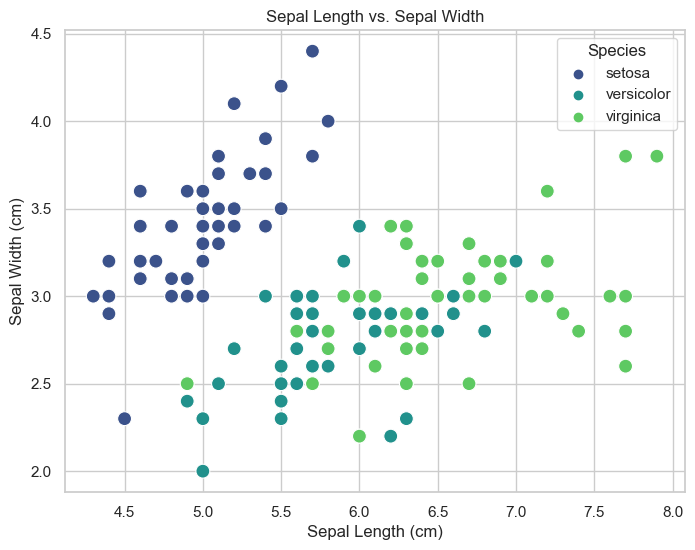

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

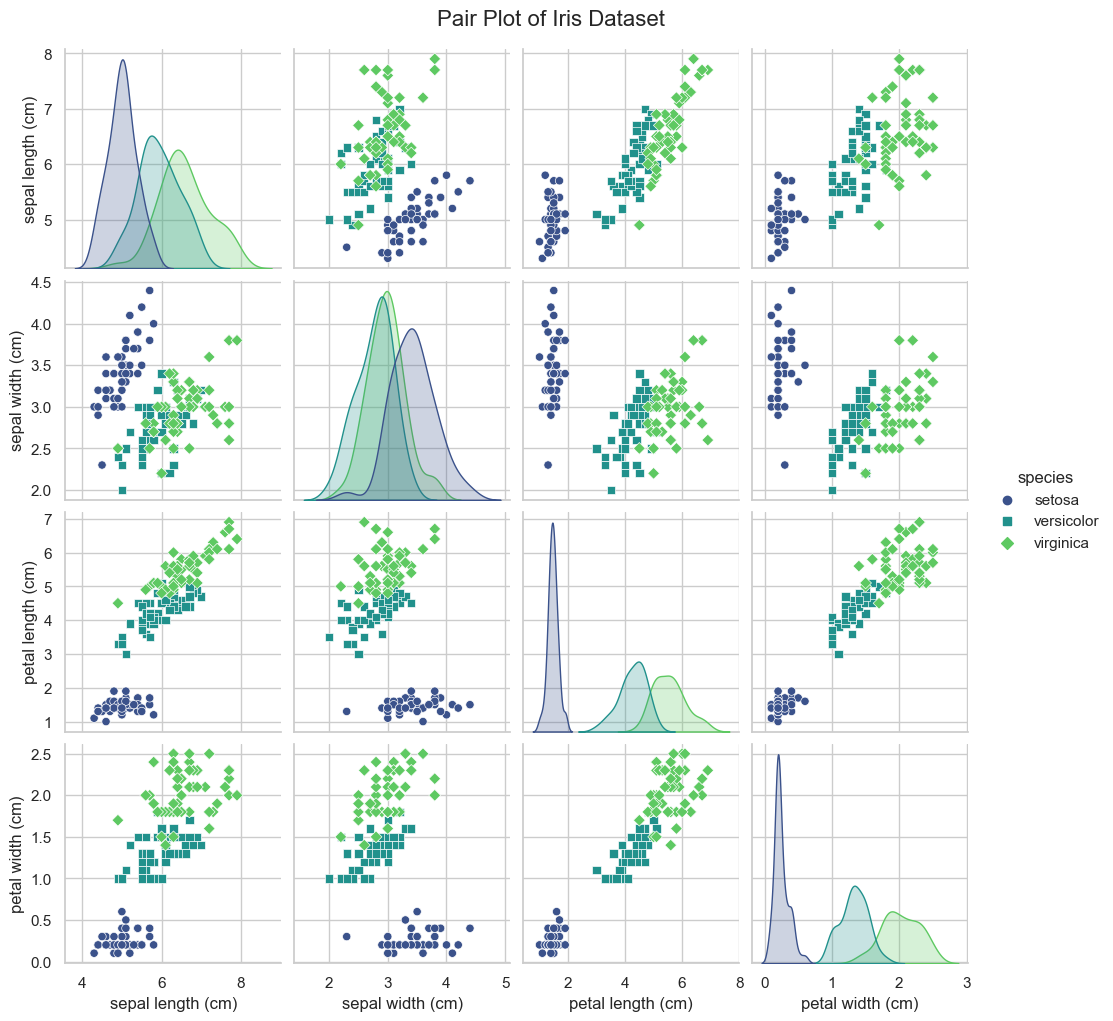

=== Logistic Regression ===
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


=== Linear Regression (Rounded) ===
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Explained Variance Ratio by PCA (2 components):
[0.92461872 0.05306648]


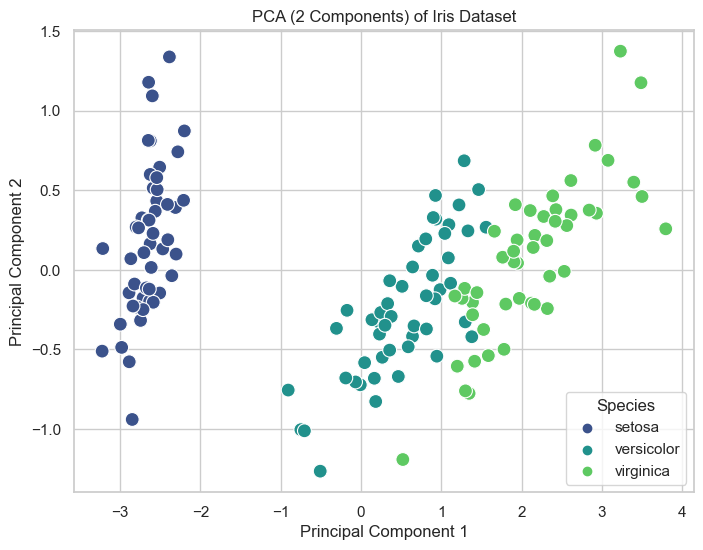

In [ ]:
##Learning ML

# ===========================
# Day 1: Complete Project on the Iris Dataset
# ===========================
#
# In this project you will:
# 1. Load and explore the Iris dataset.
# 2. Perform univariate and multivariate EDA.
# 3. Train and evaluate Logistic Regression and Linear Regression models.
# 4. Apply PCA for dimensionality reduction and visualize the results.
#
# Let's get started!

# ---------------------------
# Section 1: Import Libraries and Load Data
# ---------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# Set plotting style
sns.set_theme(style="whitegrid", palette="muted", color_codes=True)

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Map the numeric target to species names for easier interpretation
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display initial information
print("=== Head of the Dataset ===")
print(df.head(), "\n")

print("=== Dataset Info ===")
print(df.info(), "\n")

print("=== Summary Statistics ===")
print(df.describe(), "\n")

print("=== Missing Values per Column ===")
print(df.isnull().sum(), "\n")

# ---------------------------
# Section 2: Exploratory Data Analysis (EDA)
# ---------------------------
# -- 2.1 Univariate Analysis --

# Histograms for each feature
df.hist(figsize=(10, 8), bins=15, edgecolor='black')
plt.suptitle("Feature Distribution Histograms", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Box Plots by species to examine spread and potential outliers
plt.figure(figsize=(14, 6))
features = iris.feature_names
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="species", y=feature, data=df)
    plt.title(f"Box Plot of {feature}")
plt.tight_layout()
plt.show()

# -- 2.2 Multivariate Analysis --

# Scatter Plot: Sepal Length vs. Sepal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', 
                hue='species', data=df, palette='viridis', s=100)
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title="Species")
plt.show()

# Pair Plot for entire dataset providing pairwise relationships
sns.pairplot(df, hue="species", markers=["o", "s", "D"], palette="viridis")
plt.suptitle("Pair Plot of Iris Dataset", fontsize=16, y=1.02)
plt.show()

# ---------------------------
# Section 3: Machine Learning Models
# ---------------------------
# Prepare features and target
X = iris.data  # Four numeric features
y = iris.target  # Target: 0, 1, 2 corresponding to species

# Split data: 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -- 3.1 Logistic Regression (Classification) --
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
print("=== Logistic Regression ===")
print("Accuracy: {:.2f}%".format(accuracy_log * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

# -- 3.2 Linear Regression (Forced into Classification) --
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin_cont = linreg.predict(X_test)
# Since linear regression outputs continuous values, round to nearest integer and clip to valid range [0, 2]
y_pred_lin = np.clip(np.round(y_pred_lin_cont), 0, 2).astype(int)

accuracy_lin = accuracy_score(y_test, y_pred_lin)
print("\n=== Linear Regression (Rounded) ===")
print("Accuracy: {:.2f}%".format(accuracy_lin * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred_lin))

# ---------------------------
# Section 4: Dimensionality Reduction with PCA
# ---------------------------
# Apply PCA to reduce the feature space to 2 dimensions for visualization.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(iris.data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# Add species names for coloring the plots easily
pca_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print("\nExplained Variance Ratio by PCA (2 components):")
print(pca.explained_variance_ratio_)

# 2D Scatter Plot of PCA Components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='viridis', s=100)
plt.title("PCA (2 Components) of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Species")
plt.show()

# ===========================
# End of Day 1 Code
# ===========================

In [1]:
# ---------------------------
# Section 1: Import Libraries and Load Data
# ---------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

In [2]:
# Set plotting style
sns.set_theme(style="whitegrid", palette="muted", color_codes=True)

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Map the numeric target to species names for easier interpretation
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [3]:
# Display initial information
print("=== Head of the Dataset ===")
print(df.head(), "\n")

print("=== Dataset Info ===")
print(df.info(), "\n")

print("=== Summary Statistics ===")
print(df.describe(), "\n")

print("=== Missing Values per Column ===")
print(df.isnull().sum(), "\n")

=== Head of the Dataset ===
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa   

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4  

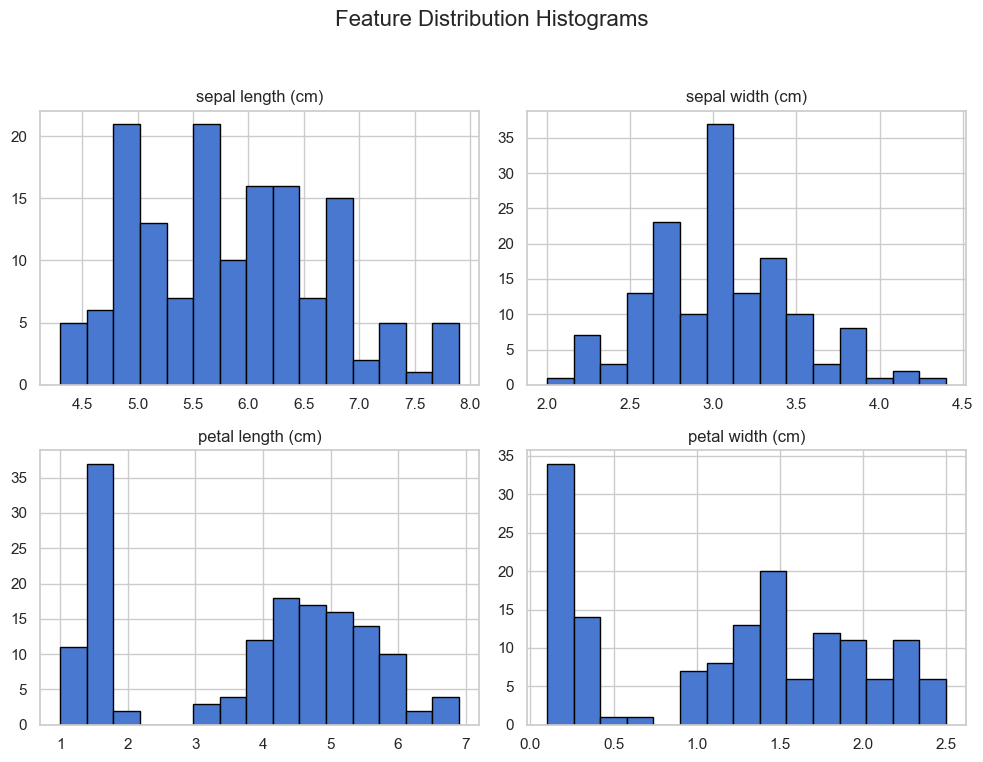

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu

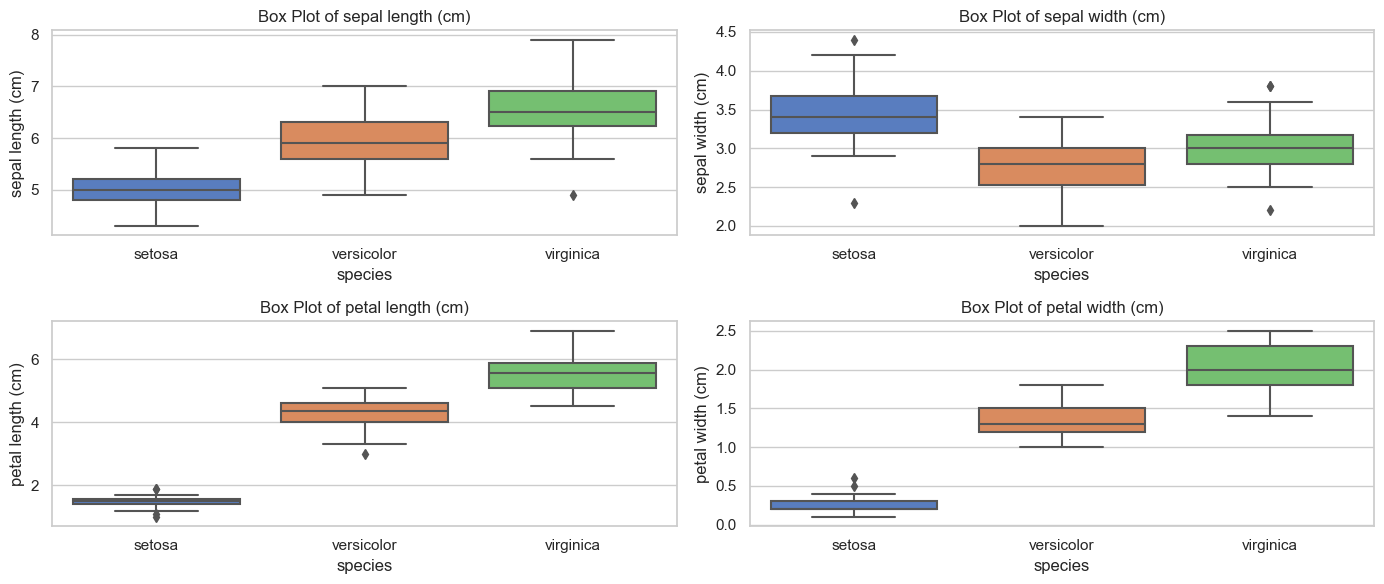

In [5]:
# ---------------------------
# Section 2: Exploratory Data Analysis (EDA)
# ---------------------------
# -- 2.1 Univariate Analysis --

# Histograms for each feature
df.hist(figsize=(10, 8), bins=15, edgecolor='black')
plt.suptitle("Feature Distribution Histograms", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Box Plots by species to examine spread and potential outliers
plt.figure(figsize=(14, 6))
features = iris.feature_names
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="species", y=feature, data=df)
    plt.title(f"Box Plot of {feature}")
plt.tight_layout()
plt.show()

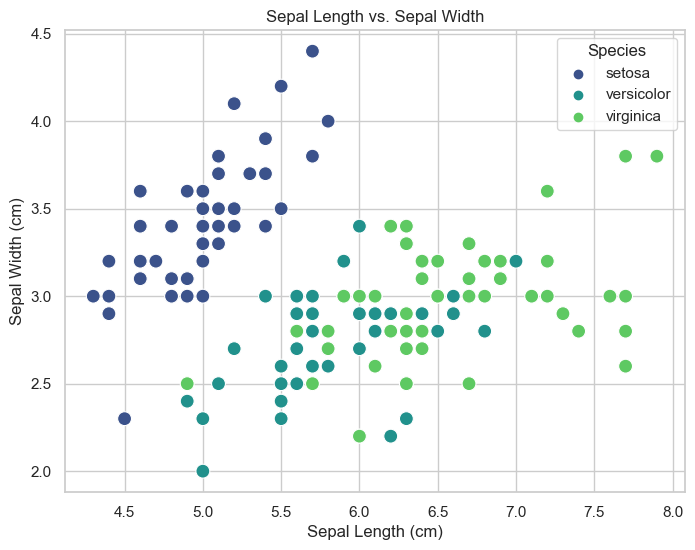

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

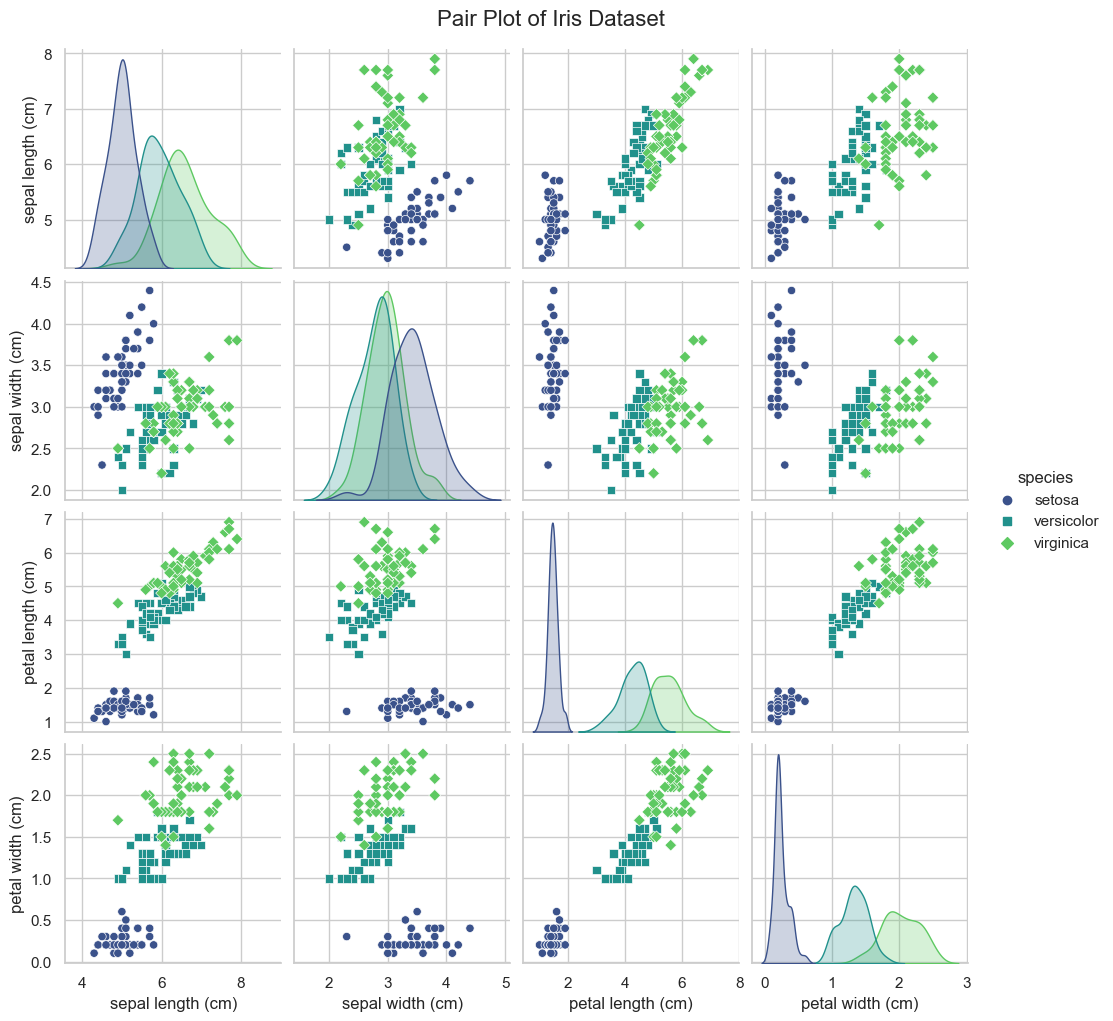

In [6]:
# -- 2.2 Multivariate Analysis --

# Scatter Plot: Sepal Length vs. Sepal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', 
                hue='species', data=df, palette='viridis', s=100)
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title="Species")
plt.show()

# Pair Plot for entire dataset providing pairwise relationships
sns.pairplot(df, hue="species", markers=["o", "s", "D"], palette="viridis")
plt.suptitle("Pair Plot of Iris Dataset", fontsize=16, y=1.02)
plt.show()

In [7]:
# ---------------------------
# Section 3: Machine Learning Models
# ---------------------------
# Prepare features and target
X = iris.data  # Four numeric features
y = iris.target  # Target: 0, 1, 2 corresponding to species

# Split data: 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# -- 3.1 Logistic Regression (Classification) --
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
print("=== Logistic Regression ===")
print("Accuracy: {:.2f}%".format(accuracy_log * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

=== Logistic Regression ===
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [10]:
# -- 3.2 Linear Regression (Forced into Classification) --
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin_cont = linreg.predict(X_test)
# Since linear regression outputs continuous values, round to nearest integer and clip to valid range [0, 2]
y_pred_lin = np.clip(np.round(y_pred_lin_cont), 0, 2).astype(int)

accuracy_lin = accuracy_score(y_test, y_pred_lin)
print("\n=== Linear Regression (Rounded) ===")
print("Accuracy: {:.2f}%".format(accuracy_lin * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred_lin))


=== Linear Regression (Rounded) ===
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45




Explained Variance Ratio by PCA (2 components):
[0.92461872 0.05306648]


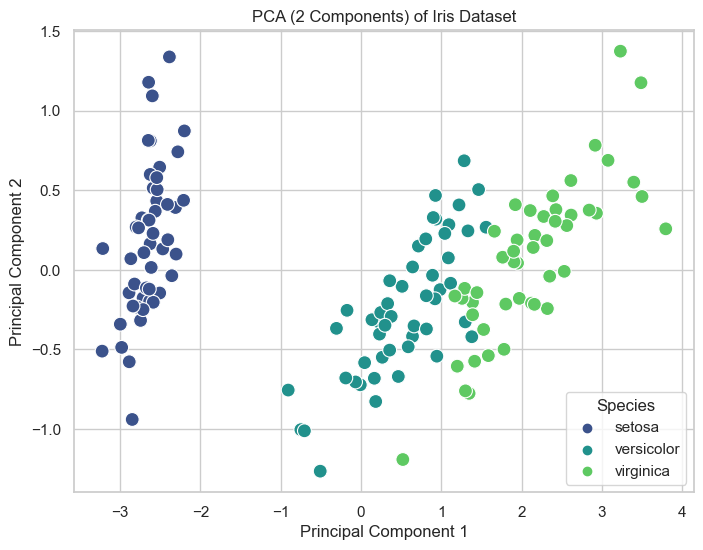

In [11]:
# ---------------------------
# Section 4: Dimensionality Reduction with PCA
# ---------------------------
# Apply PCA to reduce the feature space to 2 dimensions for visualization.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(iris.data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# Add species names for coloring the plots easily
pca_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print("\nExplained Variance Ratio by PCA (2 components):")
print(pca.explained_variance_ratio_)

# 2D Scatter Plot of PCA Components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='viridis', s=100)
plt.title("PCA (2 Components) of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Species")
plt.show()

# ===========================
# End of Day 1 Code
# ===========================

# Applying t-SNE

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

In [13]:
# Load Iris dataset
iris = load_iris()
X = iris.data 
y = iris.target

# Create a Dataframe for viz
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(y, iris.target_names)

In [14]:
tsne = TSNE(n_components=2,random_state=42,perplexity=30)
tsne_results = tsne.fit_transform(X)

In [15]:
# Create a DataFrame for t-SNE results
df_tsne = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['species'] = df['species']

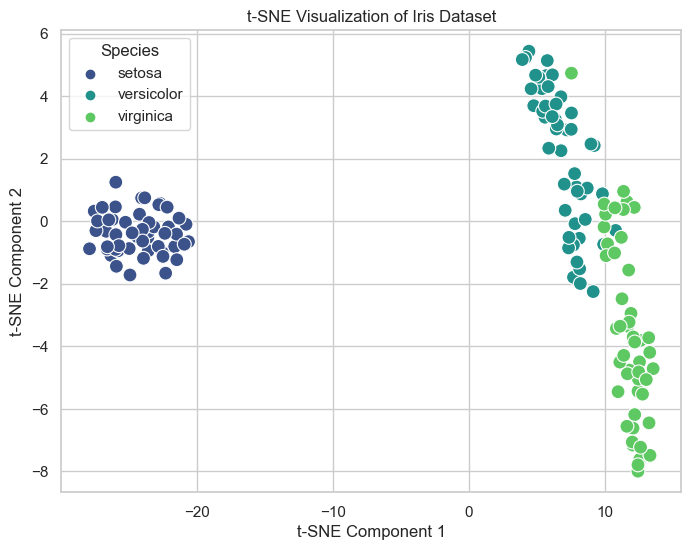

In [16]:
# Plot t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='species', data=df_tsne, palette='viridis', s=100)
plt.title("t-SNE Visualization of Iris Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Species")
plt.show()

https://data-flair.training/blogs/iris-flower-classification/

In [ ]:
# DataFlair Iris Flower Classification
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [6]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] 
# Load the data
df = pd.read_csv('iris.data', names=columns)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Some basic statistical analysis about the data
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dell\AppData

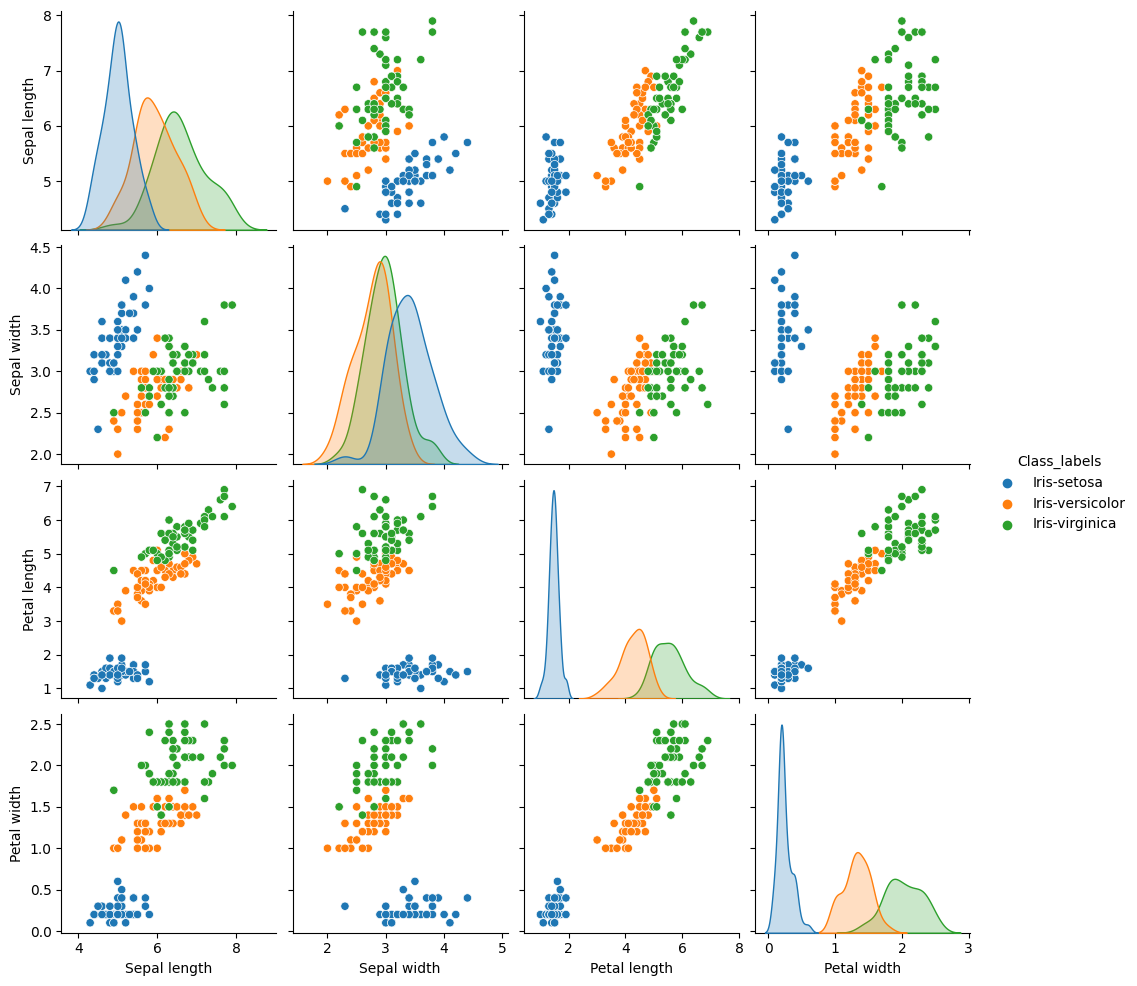

In [8]:
# Visualize the whole dataset
sns.pairplot(df, hue='Class_labels')

In [9]:
# Separate features and target  
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [10]:
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

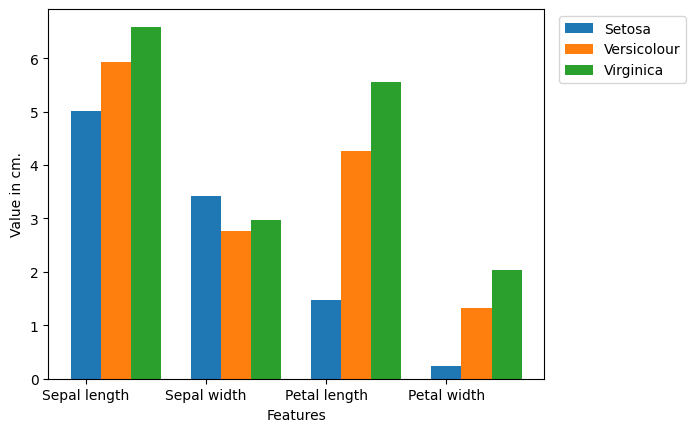

In [11]:
# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [12]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [14]:
# Predict from the test dataset
predictions = svn.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9666666666666667

In [15]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [16]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [17]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Grok : SHAP

=== Head of the Dataset ===
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa   

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4  

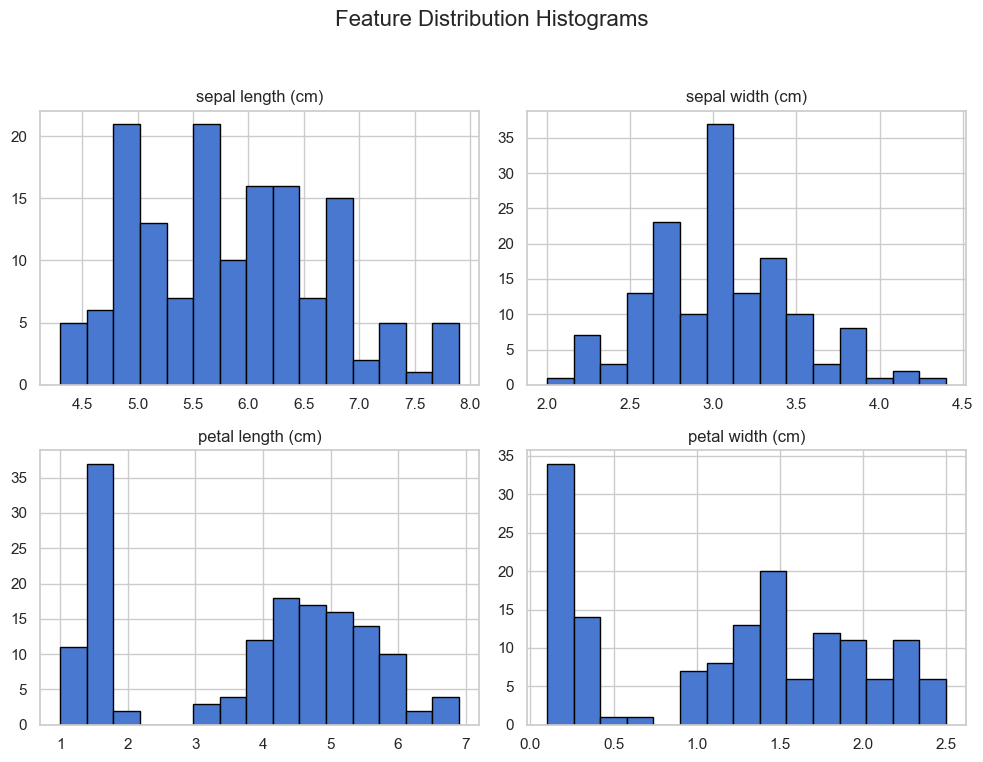

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu

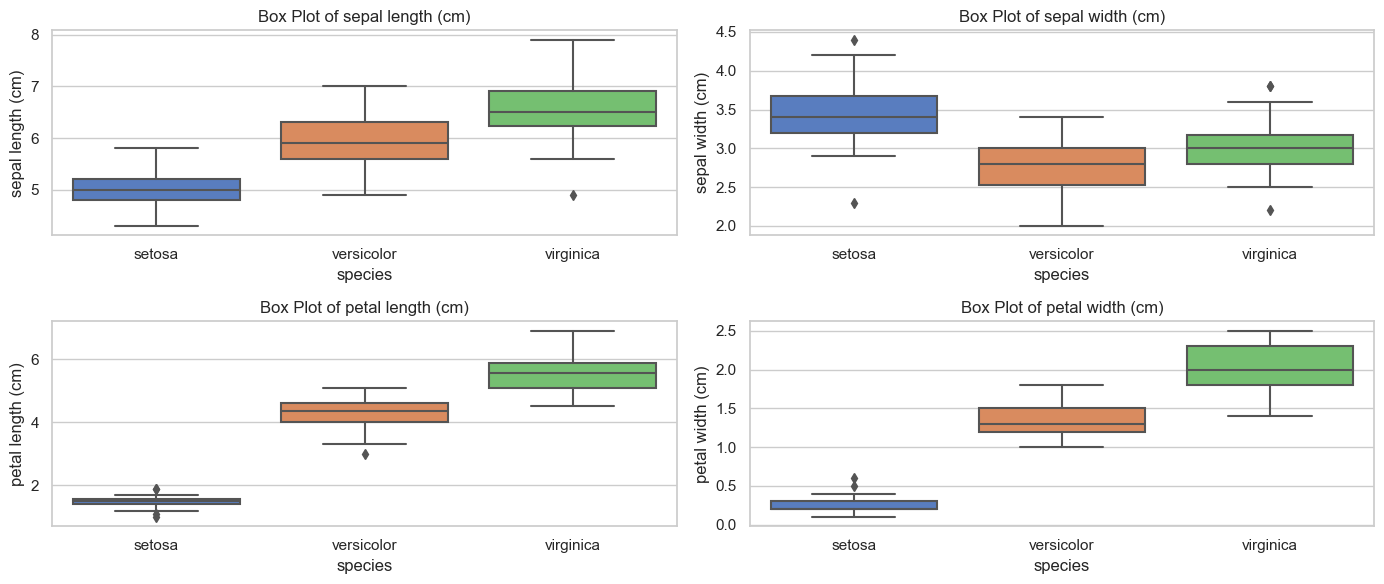

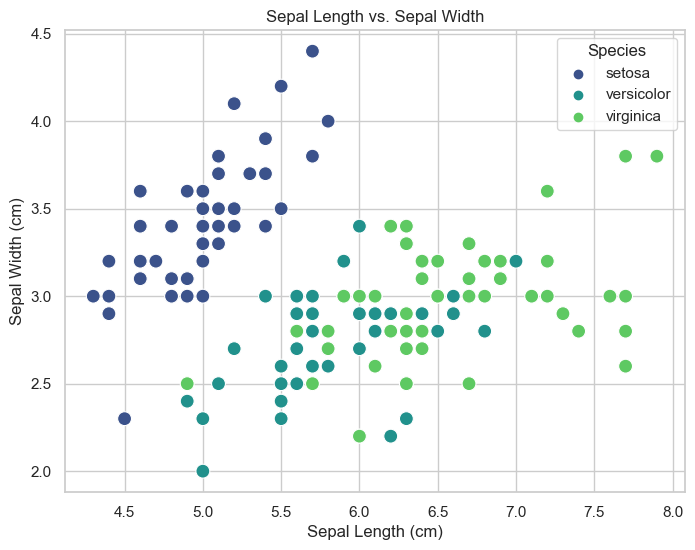

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

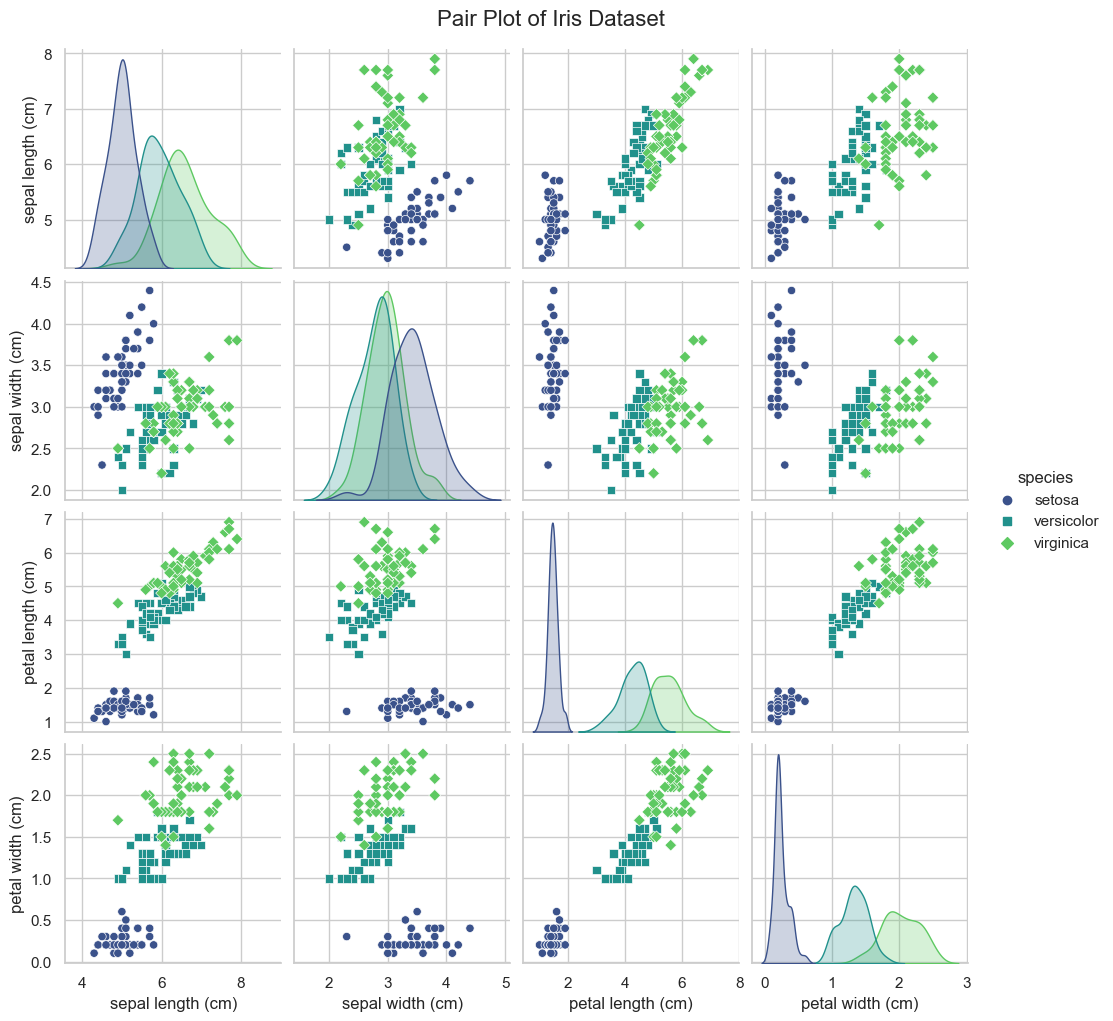

=== Logistic Regression ===
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


=== Linear Regression (Rounded) ===
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


=== Support Vector Machine ===
Accuracy: 100.00%
Classification Report:
              prec

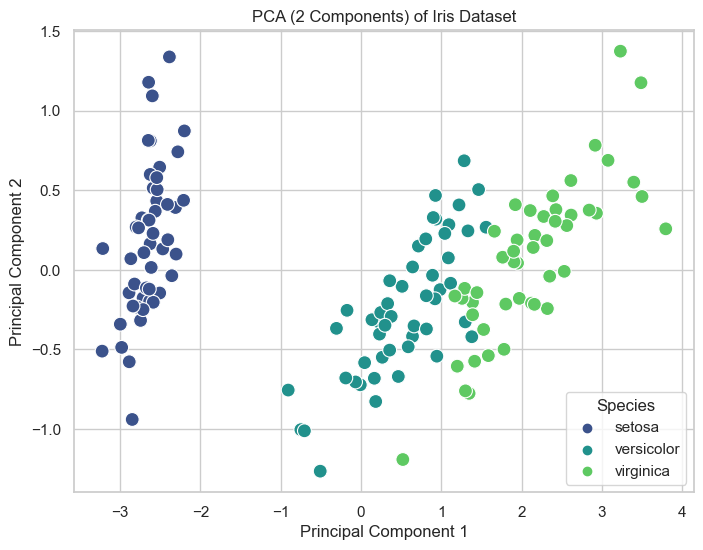

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# Set plotting style
sns.set_theme(style="whitegrid", palette="muted", color_codes=True)

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display initial information
print("=== Head of the Dataset ===")
print(df.head(), "\n")
print("=== Dataset Info ===")
print(df.info(), "\n")
print("=== Summary Statistics ===")
print(df.describe(), "\n")
print("=== Missing Values per Column ===")
print(df.isnull().sum(), "\n")

# ---------------------------
# Exploratory Data Analysis (EDA)
# ---------------------------
# Univariate Analysis
df.hist(figsize=(10, 8), bins=15, edgecolor='black')
plt.suptitle("Feature Distribution Histograms", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.figure(figsize=(14, 6))
for i, feature in enumerate(iris.feature_names, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="species", y=feature, data=df)
    plt.title(f"Box Plot of {feature}")
plt.tight_layout()
plt.show()

# Multivariate Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df, palette='viridis', s=100)
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title="Species")
plt.show()

sns.pairplot(df, hue="species", markers=["o", "s", "D"], palette="viridis")
plt.suptitle("Pair Plot of Iris Dataset", fontsize=16, y=1.02)
plt.show()

# ---------------------------
# Machine Learning Models
# ---------------------------
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print("=== Logistic Regression ===")
print("Accuracy: {:.2f}%".format(accuracy_log * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

# Linear Regression (Forced into Classification)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin_cont = linreg.predict(X_test)
y_pred_lin = np.clip(np.round(y_pred_lin_cont), 0, 2).astype(int)
accuracy_lin = accuracy_score(y_test, y_pred_lin)
print("\n=== Linear Regression (Rounded) ===")
print("Accuracy: {:.2f}%".format(accuracy_lin * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred_lin))

# Support Vector Machine (SVM)
svn = SVC(probability=True)  # Enable probability for SHAP
svn.fit(X_train, y_train)
y_pred_svm = svn.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\n=== Support Vector Machine ===")
print("Accuracy: {:.2f}%".format(accuracy_svm * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# ---------------------------
# Dimensionality Reduction with PCA
# ---------------------------
pca = PCA(n_components=2)
principal_components = pca.fit_transform(iris.data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print("\nExplained Variance Ratio by PCA (2 components):")
print(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='viridis', s=100)
plt.title("PCA (2 Components) of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Species")
plt.show()

In [23]:
# ---------------------------
# Explainable AI with SHAP
# ---------------------------
# Select a specific input to explain (first test instance)
instance = X_test[0].reshape(1, -1)
print("\n=== Explaining Prediction for Instance ===")
print("Input Features:", instance)
print("Actual Class:", iris.target_names[y_test[0]])

# SHAP for Logistic Regression
explainer_logreg = shap.LinearExplainer(logreg, X_train)
shap_values_logreg = explainer_logreg.shap_values(instance)
print("\nLogistic Regression Prediction:", iris.target_names[logreg.predict(instance)[0]])
shap.initjs()
for i in range(3):
    print(f"SHAP Explanation for class {iris.target_names[i]}:")
    shap.force_plot(
        explainer_logreg.expected_value[i],
        shap_values_logreg[i][0],
        instance[0],
        feature_names=iris.feature_names,
        show=False
    )
    plt.show()

# SHAP for SVM
explainer_svm = shap.KernelExplainer(svn.predict_proba, X_train)
shap_values_svm = explainer_svm.shap_values(instance)
print("\nSVM Prediction:", iris.target_names[svn.predict(instance)[0]])
for i in range(3):
    print(f"SHAP Explanation for class {iris.target_names[i]}:")
    shap.force_plot(
        explainer_svm.expected_value[i],
        shap_values_svm[i][0],
        instance[0],
        feature_names=iris.feature_names,
        show=False
    )
    plt.show()

# SHAP for Linear Regression (for completeness)
explainer_linreg = shap.LinearExplainer(linreg, X_train)
shap_values_linreg = explainer_linreg.shap_values(instance)
print("\nLinear Regression Prediction (Rounded):", iris.target_names[np.clip(np.round(linreg.predict(instance)[0]), 0, 2).astype(int)])
shap.force_plot(
    explainer_linreg.expected_value,
    shap_values_linreg[0],
    instance[0],
    feature_names=iris.feature_names,
    show=False
)
plt.show()


=== Explaining Prediction for Instance ===
Input Features: [[6.1 2.8 4.7 1.2]]
Actual Class: versicolor

Logistic Regression Prediction: versicolor


SHAP Explanation for class setosa:


DimensionError: Length of features is not equal to the length of shap_values!

Gemini 2.5 Pro

=== Head of the Dataset ===
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa   

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4  

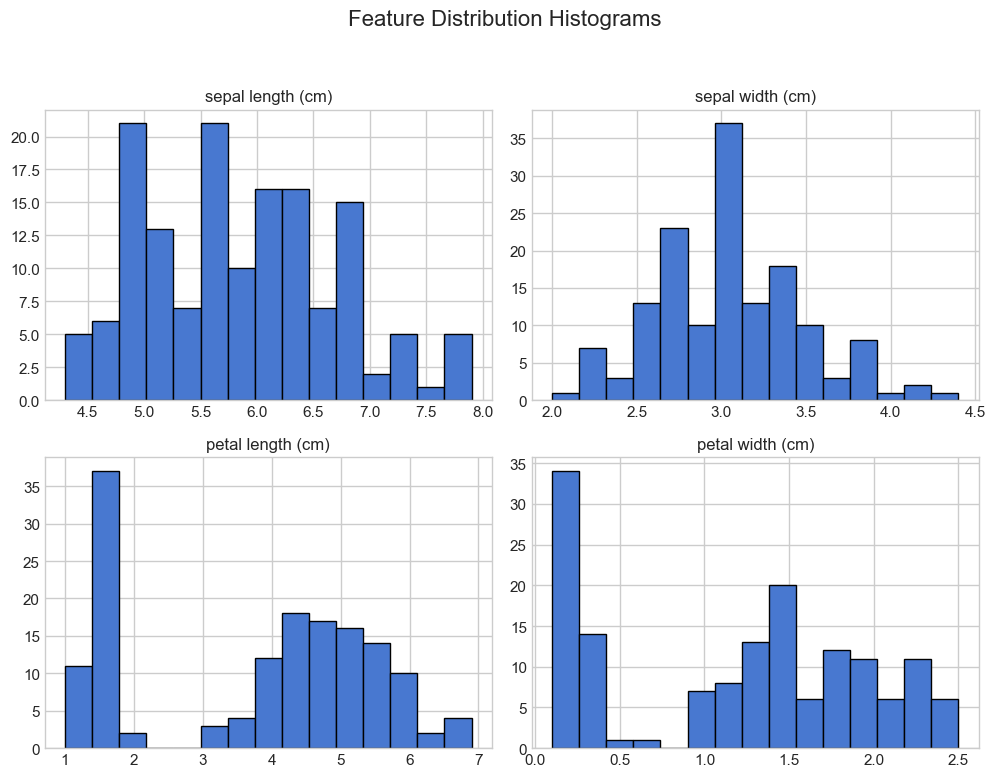


--- Generating Feature Box Plots by Species ---


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu

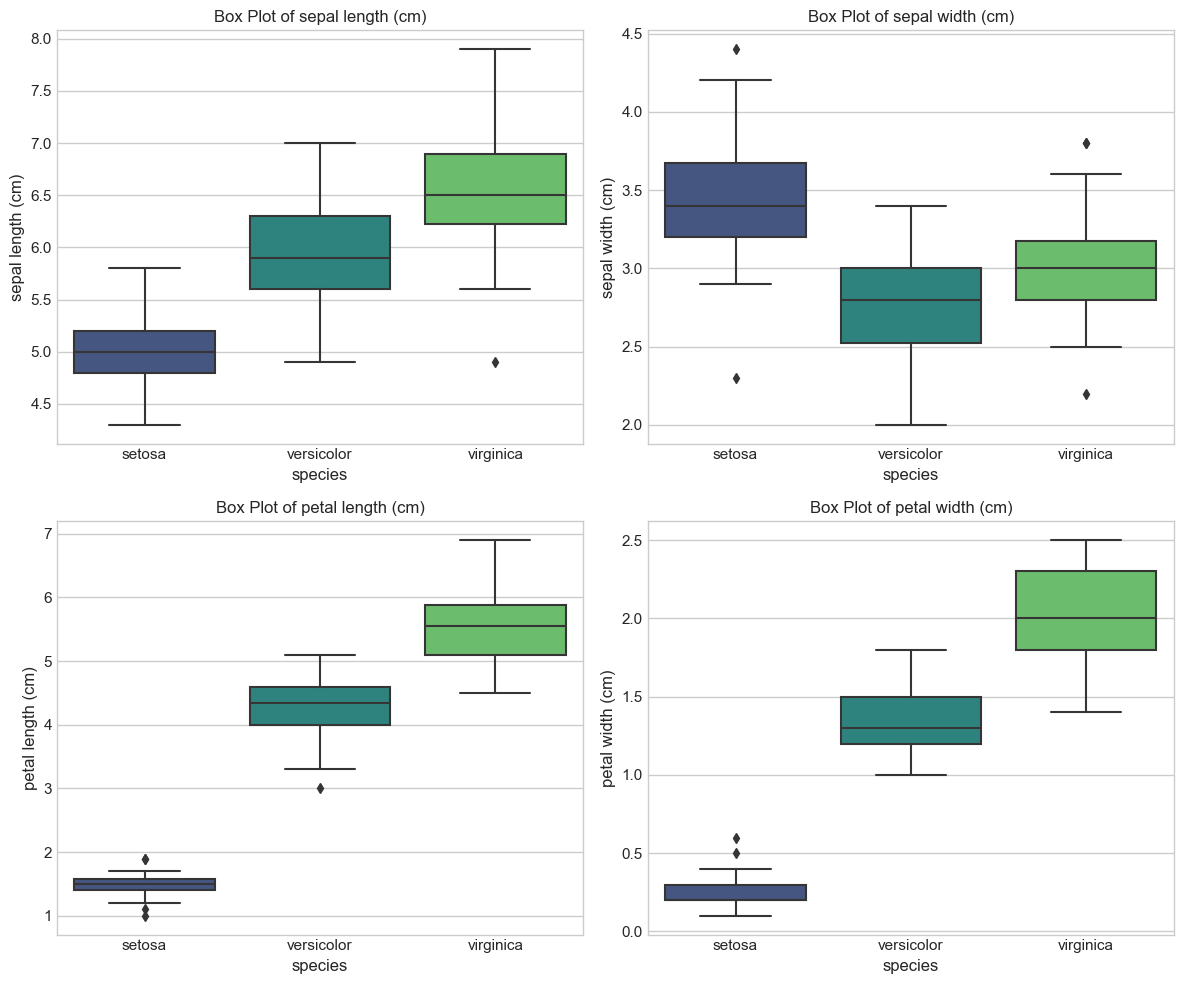


--- Generating Sepal Length vs Sepal Width Scatter Plot ---


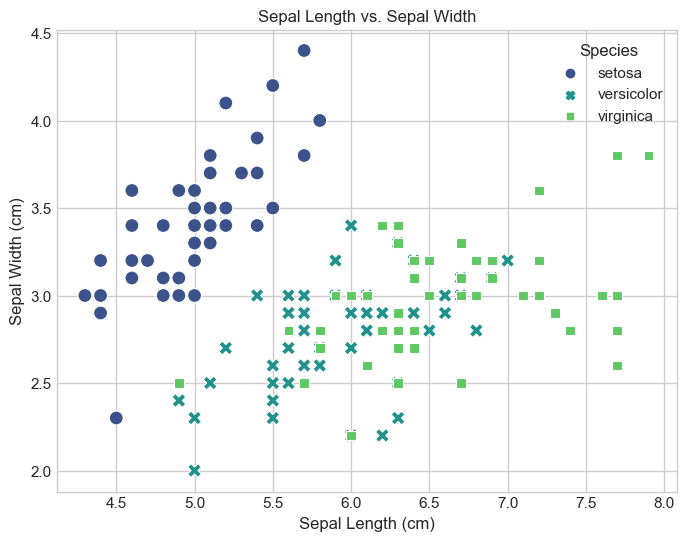


--- Generating Pair Plot ---


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

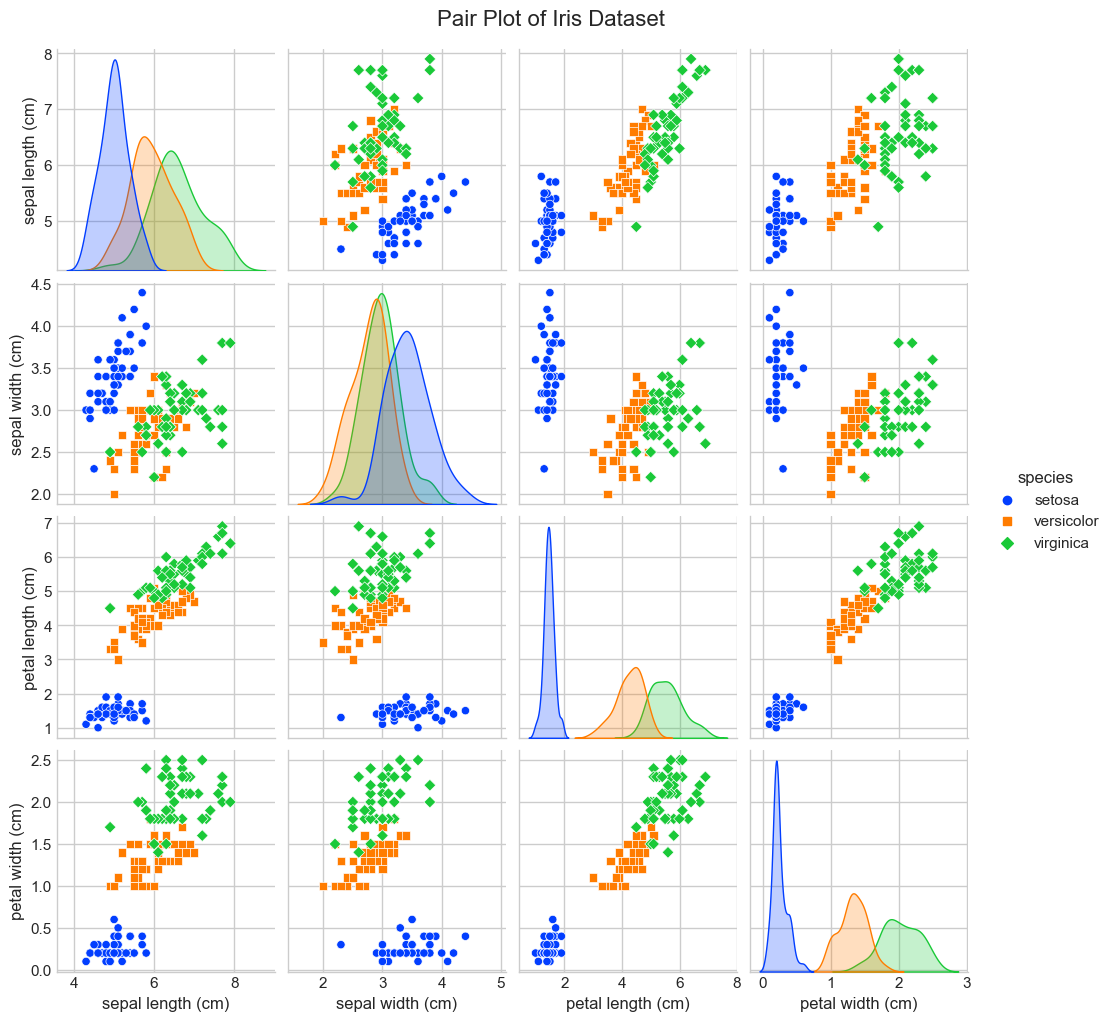


--- Generating Correlation Heatmap ---


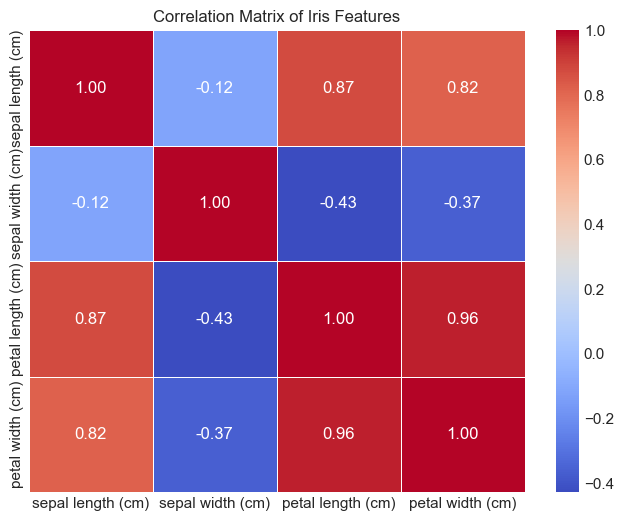


--- Splitting Data ---
Training set size: 105 samples
Test set size: 45 samples
Class distribution in training set: [35 35 35]
Class distribution in test set: [15 15 15]

--- Training Logistic Regression Model ---

=== Logistic Regression Results ===
Accuracy: 0.9556 (95.56%)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45


--- Training Linear Regression Model (for comparison) ---

=== Linear Regression (Rounded for Classification) Results ===
Accuracy: 0.9556 (95.56%)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00  

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


SHAP JS visualization initialized.

--- Creating SHAP Explainer ---

--- Calculating SHAP values for the test set (this may take a moment)... ---


100%|██████████| 45/45 [00:00<00:00, 129.65it/s]


SHAP values calculated.
Unexpected SHAP values structure: <class 'numpy.ndarray'>

--- Explaining prediction for test instance 0 ---
Features: [7.3 2.9 6.3 1.8]
Actual Class: virginica
Predicted Class: virginica (Index: 2)
Predicted Probabilities: [0.    0.063 0.937]

Generating SHAP Force Plot for instance 0 (explaining prediction for class 'virginica')
Could not generate force plot due to unexpected SHAP values structure.

--- Generating SHAP Summary Plots (Beeswarm per Class) ---
Plotting feature importance for each class...
Could not generate beeswarm plots due to unexpected SHAP values structure.

--- Generating SHAP Summary Plot (Bar - Overall Importance) ---


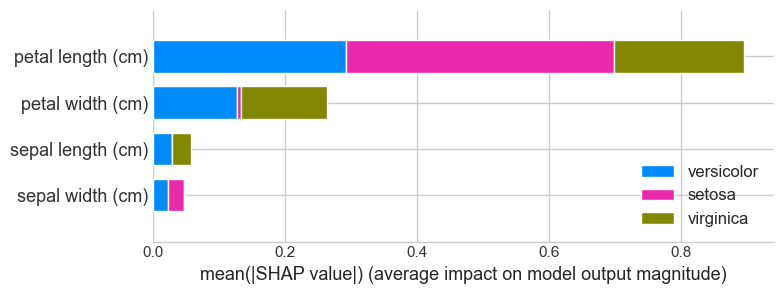


--- Generating SHAP Dependence Plots (Example: Petal Length for Versicolor) ---
Plotting dependence for 'petal length (cm)' for class 'versicolor'
Could not generate dependence plot due to unexpected SHAP values structure.


 Section 4: Dimensionality Reduction with PCA 

Explained Variance Ratio by PCA (2 components):
PC1: 0.9246
PC2: 0.0531
Total Variance Explained: 0.9777

--- Generating PCA Scatter Plot ---


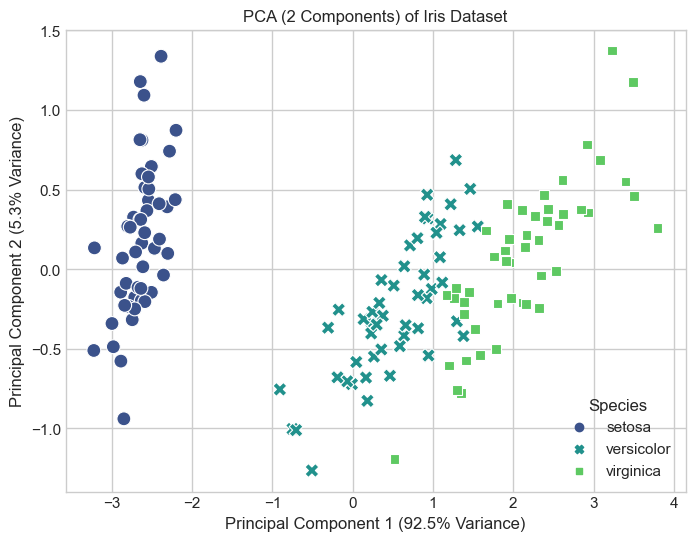



=== End of Analysis ===


In [25]:
# %% [markdown]
# # Learning ML
#
# # ===========================
# # Day 1: Complete Project on the Iris Dataset with SHAP Explanations
# # ===========================
# #
# # In this project you will:
# # 1. Load and explore the Iris dataset.
# # 2. Perform univariate and multivariate EDA.
# # 3. Train and evaluate Logistic Regression and Linear Regression models.
# # 4. Apply PCA for dimensionality reduction and visualize the results.
# # 5. Use SHAP to explain the predictions of the Logistic Regression model.
# #
# # Let's get started!

# %%
# ---------------------------
# Section 1: Import Libraries and Load Data
# ---------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap # <-- Added SHAP import

# Import necessary modules from sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# %%
# Set plotting style
# Using a style that generally works well
plt.style.use('seaborn-v0_8-whitegrid')
# sns.set_theme(style="whitegrid", palette="muted", color_codes=True) # Alternative seaborn theme

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Map the numeric target to species names for easier interpretation
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Define feature and target names for later use
feature_names = iris.feature_names
target_names = iris.target_names

# %%
# Display initial information
print("=== Head of the Dataset ===")
print(df.head(), "\n")

print("=== Dataset Info ===")
# Capture info in a buffer if needed, otherwise print directly
df.info()
print("\n") # Add newline for spacing

print("=== Summary Statistics ===")
print(df.describe(), "\n")

print("=== Missing Values per Column ===")
print(df.isnull().sum(), "\n")

# %%
# ---------------------------
# Section 2: Exploratory Data Analysis (EDA)
# ---------------------------
# -- 2.1 Univariate Analysis --

# Histograms for each feature
print("--- Generating Feature Histograms ---")
df.hist(figsize=(10, 8), bins=15, edgecolor='black')
plt.suptitle("Feature Distribution Histograms", fontsize=16, y=1.0) # Adjusted y position
plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjusted rect
plt.show()

# Box Plots by species to examine spread and potential outliers
print("\n--- Generating Feature Box Plots by Species ---")
plt.figure(figsize=(12, 10))
for i, feature in enumerate(feature_names, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="species", y=feature, data=df, palette="viridis") # Added palette
    plt.title(f"Box Plot of {feature}")
plt.tight_layout()
plt.show()

# %%
# -- 2.2 Multivariate Analysis --

# Scatter Plot: Sepal Length vs. Sepal Width
print("\n--- Generating Sepal Length vs Sepal Width Scatter Plot ---")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)',
                hue='species', data=df, palette='viridis', s=100, style='species')
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title="Species")
plt.show()

# Pair Plot for entire dataset providing pairwise relationships
print("\n--- Generating Pair Plot ---")
sns.pairplot(df, hue="species", markers=["o", "s", "D"], palette="bright")
plt.suptitle("Pair Plot of Iris Dataset", fontsize=16, y=1.02)
plt.show()

# Correlation heatmap
print("\n--- Generating Correlation Heatmap ---")
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) # Added linewidths
plt.title('Correlation Matrix of Iris Features')
plt.show()


# %%
# ---------------------------
# Section 3: Machine Learning Models
# ---------------------------
# Prepare features and target
X = iris.data
y = iris.target

# Split data: 70% training and 30% testing
# Added stratify=y to maintain class proportions in train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\n--- Splitting Data ---")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Class distribution in training set: {np.bincount(y_train)}")
print(f"Class distribution in test set: {np.bincount(y_test)}")


# %%
# -- 3.1 Logistic Regression (Classification) --
print("\n--- Training Logistic Regression Model ---")
# Using 'saga' solver which often works well with multinomial and larger datasets, increased max_iter
logreg = LogisticRegression(max_iter=1000, multi_class='auto', solver='saga', random_state=42)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
y_prob_log = logreg.predict_proba(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
print("\n=== Logistic Regression Results ===")
print(f"Accuracy: {accuracy_log:.4f} ({accuracy_log * 100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log, target_names=target_names))

# %%
# -- 3.2 Linear Regression (Forced into Classification - For Demonstration) --
print("\n--- Training Linear Regression Model (for comparison) ---")
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin_cont = linreg.predict(X_test)
y_pred_lin = np.clip(np.round(y_pred_lin_cont), 0, 2).astype(int)

accuracy_lin = accuracy_score(y_test, y_pred_lin)
print("\n=== Linear Regression (Rounded for Classification) Results ===")
print(f"Accuracy: {accuracy_lin:.4f} ({accuracy_lin * 100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lin, target_names=target_names))
print("Note: Linear Regression is not ideal for classification. Lower performance is expected.")


# %%
# ---------------------------
# Section 3.3: Explainable AI with SHAP (for Logistic Regression)
# ---------------------------
print("\n\n========================================================")
print(" Section 3.3: Explainable AI with SHAP ")
print("========================================================")

# Initialize JavaScript visualization support
try:
    shap.initjs()
    print("SHAP JS visualization initialized.")
except Exception as e:
    print(f"Could not initialize SHAP JS ({e}), plots may use Matplotlib backend.")

# Create a SHAP explainer object for the Logistic Regression model.
# Using logreg.predict_proba allows explaining the probability output for each class.
# Using X_train as the background dataset is common practice for KernelExplainer/similar approaches.
print("\n--- Creating SHAP Explainer ---")
# Using shap.KernelExplainer as a robust model-agnostic approach
# We pass the model's predict_proba function and a sample of the training data
# Using a smaller sample (e.g., 50) for KernelExplainer background can speed things up
background_data = shap.sample(X_train, 50)
explainer = shap.KernelExplainer(logreg.predict_proba, background_data)
# Note: For linear models, shap.LinearExplainer(logreg, background_data) is usually faster

# Calculate SHAP values for the test set. This can take some time with KernelExplainer.
print("\n--- Calculating SHAP values for the test set (this may take a moment)... ---")
shap_values = explainer.shap_values(X_test)
print("SHAP values calculated.")

# shap_values structure for multi-class (predict_proba) with KernelExplainer:
# It's typically a list of arrays, where each array corresponds to a class.
# shap_values[i] has shape (n_samples, n_features) for class i.
if isinstance(shap_values, list):
    print(f"SHAP values structure: List of {len(shap_values)} arrays")
    print(f"Shape of SHAP values for class 0: {shap_values[0].shape}")
    num_classes = len(shap_values)
else:
    # Handle unexpected structure if necessary
    print(f"Unexpected SHAP values structure: {type(shap_values)}")
    # Attempt to infer num_classes if possible, otherwise exit or handle error
    num_classes = 3 # Assuming 3 for Iris if detection fails


# --- Visualize Individual Prediction Explanation ---
instance_index = 0
print(f"\n--- Explaining prediction for test instance {instance_index} ---")
actual_class = target_names[y_test[instance_index]]
predicted_class_idx = y_pred_log[instance_index]
predicted_class = target_names[predicted_class_idx]
print(f"Features: {np.round(X_test[instance_index], 2)}")
print(f"Actual Class: {actual_class}")
print(f"Predicted Class: {predicted_class} (Index: {predicted_class_idx})")
print(f"Predicted Probabilities: {np.round(y_prob_log[instance_index], 3)}")

# Generate a force plot for the first instance for the *predicted* class.
print(f"\nGenerating SHAP Force Plot for instance {instance_index} (explaining prediction for class '{predicted_class}')")

# explainer.expected_value gives the base rate (average prediction) for each class
# shap_values[class_idx][instance_idx, :] gives SHAP values for one instance, one class
if isinstance(shap_values, list) and len(shap_values) > predicted_class_idx:
    shap.force_plot(explainer.expected_value[predicted_class_idx],
                    shap_values[predicted_class_idx][instance_index,:],
                    X_test[instance_index,:],
                    feature_names=feature_names,
                    matplotlib=False) # Set matplotlib=True if JS plots don't render
else:
    print("Could not generate force plot due to unexpected SHAP values structure.")


# --- Visualize Overall Feature Importance ---

# *** CORRECTED SECTION FOR BEESWARM PLOTS ***
# Summary Plot (Beeswarm) - Must be plotted per class for multi-output explanations
print("\n--- Generating SHAP Summary Plots (Beeswarm per Class) ---")
print("Plotting feature importance for each class...")

if isinstance(shap_values, list):
    # Iterate through each class and plot its beeswarm summary
    for i in range(num_classes):
        print(f"\nGenerating Beeswarm plot for Class: {target_names[i]}")
        # Pass the SHAP values specific to class 'i'
        shap.summary_plot(shap_values[i], X_test, feature_names=feature_names,
                          plot_type='dot', show=False) # Use 'dot' for beeswarm
        plt.title(f"SHAP Summary (Beeswarm) for Class: {target_names[i]}")
        plt.show() # Display the plot for the current class
else:
    print("Could not generate beeswarm plots due to unexpected SHAP values structure.")

# Summary Plot (Bar) - Shows average absolute SHAP value per feature (overall importance)
# This works directly with the list of SHAP value arrays.
print("\n--- Generating SHAP Summary Plot (Bar - Overall Importance) ---")
shap.summary_plot(shap_values, X_test, feature_names=feature_names,
                  class_names=target_names, plot_type="bar", show=True)


# --- Dependence Plots ---
# Show how the value of a single feature affects the SHAP value for that feature,
# potentially colored by an interacting feature.
print("\n--- Generating SHAP Dependence Plots (Example: Petal Length for Versicolor) ---")
class_index_for_dependence = 1 # Versicolor
feature_for_dependence = 'petal length (cm)'
feature_index = feature_names.index(feature_for_dependence) # Get index of the feature

print(f"Plotting dependence for '{feature_for_dependence}' for class '{target_names[class_index_for_dependence]}'")

if isinstance(shap_values, list):
    shap.dependence_plot(
        feature_index, # Can use index or name
        shap_values[class_index_for_dependence], # SHAP values for the chosen class
        X_test, # Feature values
        feature_names=feature_names,
        interaction_index="petal width (cm)", # Color by interaction with petal width
        show=False
    )
    plt.title(f"SHAP Dependence Plot for {feature_for_dependence} (Class: {target_names[class_index_for_dependence]})")
    plt.show()
else:
    print("Could not generate dependence plot due to unexpected SHAP values structure.")


# %%
# ---------------------------
# Section 4: Dimensionality Reduction with PCA
# ---------------------------
print("\n\n========================================================")
print(" Section 4: Dimensionality Reduction with PCA ")
print("========================================================")

# Apply PCA to reduce the feature space to 2 dimensions for visualization.
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(X) # Fit on the whole dataset for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print("\nExplained Variance Ratio by PCA (2 components):")
print(f"PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Total Variance Explained: {pca.explained_variance_ratio_.sum():.4f}")

# 2D Scatter Plot of PCA Components
print("\n--- Generating PCA Scatter Plot ---")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='viridis', s=100, style='species')
plt.title("PCA (2 Components) of Iris Dataset")
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance)")
plt.legend(title="Species")
plt.grid(True)
plt.show()

# ===========================
# End of Day 1 Code
# ===========================
print("\n\n=== End of Analysis ===")
